In [226]:
from numpy import *
datMat=matrix([[0],  #x0=1 对应w0*x0=w0常数项
              [1.2],
              [2.5]]              
              )
y = mat([0,1,2])
print (datMat.T*datMat)
#print (datMat.T*y.T)
#print (linalg.det(mtm))

[[7.69]]


In [232]:
#标准回归函数

def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T    
    xTx = xMat.T*xMat
    if linalg.det(xTx)==0.0:
        print ("This matrix is singular,cannot do inverse")
        return
    ws1 = xTx.I * (xMat.T*yMat)    #w = (X.T*X).I*X.T*Y
    #ws2 = linalg.solve(xTx,xMat.T*yMat)    #numpy.linalg.solve(a,b)返回ax=b的解
    return ws1
xMat = datMat; yMat=y
xMat1 = mat(ones((shape(xMat)[0],shape(xMat)[1]+1)))
xMat1[:,1:] = xMat
ws = standRegres(xMat1,yMat)
print (ws)
print (xMat1*ws)

[[0.01385928]
 [0.79957356]]
[[0.01385928]
 [0.97334755]
 [2.01279318]]


[0.  1.2 2.5]


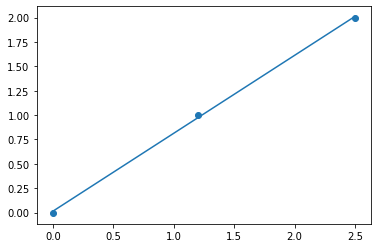

In [235]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
xMat = datMat; yMat=y
print (xMat[:,0].flatten().A[0])
ax.scatter(xMat[:,0].flatten().A[0],yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xMat1*ws
ax.plot(xCopy[:,0],yHat)
plt.show()

In [5]:
mat(eye((3)))

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [236]:
#局部加权线性回归函数，局部的点
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m))) #对角矩阵，为每个样本点初始化了一个权重1
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2)) #weights(i,i)=exp(abs(x(i)-x)/(-2k^2)),x与xi越近，
                                                          #weights(i,i)会越大，k越小，xi附近越少的点被用于训练模型
    xTx = xMat.T * (weights * xMat) #随着样本点与待预测点距离的递增，权重将以指数级衰减，k控制衰减的速度
    if linalg.det(xTx)==0.0:
        print ("This matrix is singular,cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat)) #w=(X.T*Weights*X).I*X.T*weights*Y
    return testPoint * ws #对于每个testpoint，ws都是不一样的

def lwlrTest(testArr, xArr, yArr,k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

xMat = datMat; yMat=y
print (yMat.T[1])
print (lwlr(xMat[1],xMat,yMat,k=1))
print (lwlr(xMat[1],xMat,yMat,k=0.5))
print (lwlr(xMat[1],xMat,yMat,k=1.3))
print (lwlrTest(xMat,xMat,yMat,k=1))

[[1]]
[[0.97396454]]
[[0.99485002]]
[[0.97101166]]
[0.         0.97396454 2.00750476]


In [244]:
srtInd = xMat[:,0].argsort(0)#按列排序axis=0


In [245]:
xSort = xMat[srtInd][:,0]
yHat = lwlrTest(xMat,xMat,yMat,k=0.5) #k取值过小容易过拟合，考虑了太多噪声

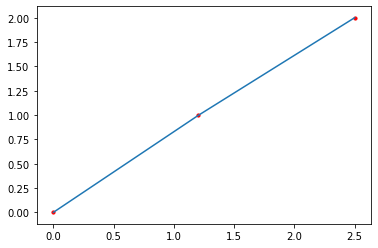

In [246]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,0],yHat[srtInd])#回归曲线
ax.scatter(xMat[:,0].flatten().A[0],yMat.T.flatten().A[0],s=10,c='red')#原始样本点
plt.show()

In [254]:

xMat = datMat; yMat=y
yHat05 = lwlrTest(xMat,xMat,yMat,k=0.5) 
yHat1 = lwlrTest(xMat,xMat,yMat,k=1) 
yHatS = xMat1*standRegres(xMat1,yMat)
print (yHat05,((yMat.A-yHat05)**2).sum())
print (yHat1,((yMat.A-yHat1)**2).sum())
print (yHatS,((yMat.A-yHatS.A.T)**2).sum())

[0.         0.99485002 2.00064862] 2.694297019667871e-05
[0.         0.97396454 2.00750476] 0.0007341666058161336
[[0.01385928]
 [0.97334755]
 [2.01279318]] 0.0010660980810234552


In [272]:
#岭回归 Ridge Regression，用于求解n>m特征比样本点多的情形，岭回归需要先做标准化standardize
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat;yMat = yMat.T
    denom = xTx + eye(shape(xMat)[1])*lam #w = (xTx +lam*I).I * x.T*Y
    if linalg.det(denom)==0.0:
        print ("This matrix is singular,cannot do inverse")
        return
    ws = denom.I*(xMat.T*yMat)
    return ws

def ridgeTest(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr)
    yMean = mean(yMat,1) #axis=1对行求均值
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)  #axis=0对列求var
    xMat = (xMat - xMeans)/xVar #normalize
    #print (xMat)
    numTestPts = 100
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        #print (ws)
        wMat[i,:] = ws.T
    return wMat

In [273]:

xMat = datMat; yMat=y
ridgeRegres(xMat,yMat) #没有常数项的系数，截距

matrix([[0.78580482]])

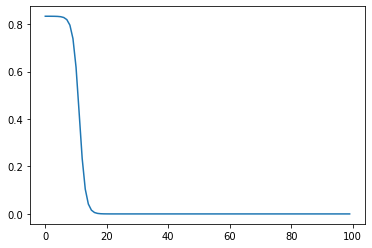

In [274]:
ridgeWeights = ridgeTest(xMat,yMat)
wMat = ridgeTest(xMat,yMat)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show() #在最左边可以得到系数的原始值（与线性回归一致,此时lam~0），在右边，系数全部缩减为0，在中间某部分可取得最好的预测效果

In [275]:
print (ridgeWeights)

[[8.33320190e-01]
 [8.33297607e-01]
 [8.33236226e-01]
 [8.33069421e-01]
 [8.32616337e-01]
 [8.31387212e-01]
 [8.28064369e-01]
 [8.19164735e-01]
 [7.95912337e-01]
 [7.38899048e-01]
 [6.18471688e-01]
 [4.28591972e-01]
 [2.33622186e-01]
 [1.04455692e-01]
 [4.17338545e-02]
 [1.58549470e-02]
 [5.90371113e-03]
 [2.18162376e-03]
 [8.03904879e-04]
 [2.95920529e-04]
 [1.08887521e-04]
 [4.00607892e-05]
 [1.47379886e-05]
 [5.42186362e-06]
 [1.99460036e-06]
 [7.33773577e-07]
 [2.69940364e-07]
 [9.93055305e-08]
 [3.65324658e-08]
 [1.34395435e-08]
 [4.94413179e-09]
 [1.81884445e-09]
 [6.69115480e-10]
 [2.46153829e-10]
 [9.05549331e-11]
 [3.33132982e-11]
 [1.22552775e-11]
 [4.50846465e-12]
 [1.65857145e-12]
 [6.10154340e-13]
 [2.24463238e-13]
 [8.25754104e-14]
 [3.03777958e-14]
 [1.11753666e-14]
 [4.11118760e-15]
 [1.51242140e-15]
 [5.56388739e-16]
 [2.04683978e-16]
 [7.52990275e-17]
 [2.77009642e-17]
 [1.01906152e-17]
 [3.74891783e-18]
 [1.37914980e-18]
 [5.07360857e-19]
 [1.86647628e-19]
 [6.866382

In [276]:
yHat_ridge = xMat*ridgeRegres(xMat,yMat)[-1]
print (((yMat.A-yHat_ridge.A.T)**2).sum())

0.00451229757710981


In [259]:
#前向逐步回归
def stageWise(xArr,yArr,eps=0.01,numIt=100):#eps每次迭代需要调整的步长，numIt迭代次数
    xMat = mat(xArr);yMat = mat(yArr)
    yMean = mean(yMat,1)
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)  #axis=0对列求var
    xMat = (xMat - xMeans)/xVar #standardize
    m,n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1));wsTest = ws.copy();wsMax = ws.copy()
    lowestError = inf
    for i in range(numIt):
        #print (ws.T)
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] +=eps*sign
                yTest = xMat*wsTest
                rssE = ((yMat.A-yTest.A.T)**2).sum()
                if rssE< lowestError:
                    lowestError = rssE
                    wsMax =wsTest
                    print (lowestError)
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [261]:
xMat = datMat; yMat=y
stageWise(xMat,yMat,eps = 0.01,numIt = 100)#最后收敛

2.048262260127932
1.952313432835821
1.9052025586353942
1.8586673773987208
1.8127078891257997
1.767324093816631
1.7225159914712154
1.678283582089552
1.6346268656716418
1.5915458422174842
1.549040511727079
1.5071108742004264
1.4657569296375268
1.4249786780383795
1.3847761194029853
1.3451492537313432
1.3060980810234541
1.2676226012793177
1.2297228144989338
1.1923987206823028
1.1556503198294241
1.1194776119402983
1.0838805970149252
1.0488592750533048
1.014413646055437
0.9805437100213221
0.9472494669509595
0.9145309168443496
0.8823880597014925
0.8508208955223879
0.8198294243070361
0.7894136460554368
0.7595735607675904
0.7303091684434967
0.7016204690831553
0.6735074626865669
0.6459701492537311
0.6190085287846478
0.5926226012793172
0.5668123667377395
0.5415778251599144
0.5169189765458418
0.4928358208955219
0.4693283582089548
0.4463965884861404
0.42404051172707846
0.40226012793176935
0.3810554371002127
0.360426439232409
0.3403731343283577
0.3208955223880595
0.3019936034115136
0.283667377398720

array([[0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.66],
       [0.

In [262]:
def regulation(xArr,yArr):
    xMat = mat(xArr);yMat = mat(yArr)
    #yMean = mean(yMat,1)
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)  #axis=0对列求var
    xMat = (xMat - xMeans)/xVar #standardize
    
    return xMat,yMat

In [263]:
xMat = datMat; yMat=y
xMat1,yMat1 = regulation(datMat,y)
ws_stand = standRegres(xMat1,yMat1) #ws与迭代后收敛的相同0.83,用迭代收敛法时要先将X标准正态分布,所以这里标准回归也要先做X标准化

print ("ws_stand",ws_stand)


ws_stand [[0.83333333]]


In [264]:
xMat = datMat; yMat=y
ws_stage = stageWise(xMat,yMat,eps = 0.01,numIt = 100)
#print(mat(ws_stage))
yHat_stage = xMat*mat(ws_stage)[99].T
print ("ws_stage",ws_stage)
print ("yhat_stage",yHat_stage)
print (((yMat.A-yHat_stage.A.T)**2).sum())

2.048262260127932
1.952313432835821
1.9052025586353942
1.8586673773987208
1.8127078891257997
1.767324093816631
1.7225159914712154
1.678283582089552
1.6346268656716418
1.5915458422174842
1.549040511727079
1.5071108742004264
1.4657569296375268
1.4249786780383795
1.3847761194029853
1.3451492537313432
1.3060980810234541
1.2676226012793177
1.2297228144989338
1.1923987206823028
1.1556503198294241
1.1194776119402983
1.0838805970149252
1.0488592750533048
1.014413646055437
0.9805437100213221
0.9472494669509595
0.9145309168443496
0.8823880597014925
0.8508208955223879
0.8198294243070361
0.7894136460554368
0.7595735607675904
0.7303091684434967
0.7016204690831553
0.6735074626865669
0.6459701492537311
0.6190085287846478
0.5926226012793172
0.5668123667377395
0.5415778251599144
0.5169189765458418
0.4928358208955219
0.4693283582089548
0.4463965884861404
0.42404051172707846
0.40226012793176935
0.3810554371002127
0.360426439232409
0.3403731343283577
0.3208955223880595
0.3019936034115136
0.283667377398720

In [267]:
from sklearn.linear_model import LinearRegression
xMat = datMat; yMat=y
reg = LinearRegression(fit_intercept=True,normalize=True).fit(xMat, (yMat).T)#用normalize后的误差平方和更小 norm=l2,范数：欧式距离
print (reg.coef_)
yHat_sk = mat(reg.predict(xMat))
print (((yMat.A-yHat_sk.A.T)**2).sum()) #sklearn的结果比前向逐步线性回归略好一点,比岭回归也稍好一点，sklearn优于岭回归，优于前向逐步回归


[[0.79957356]]
0.001066098081023461
